# Experimenting With Large Games

We've seen a good deal of information about a 10-toothpick game. What happens if we scale it up?

## Preface

From previous analysis, we have seen that Player 1 is capable of winning 100% of the time on a set of 10 toothpicks if previous game data is provided. We have also seen that, given this data, it becomes impossible for Player 2 to win after any number of generations. We will now look at what happens when the number of toothpicks is changed and see how this factor affects the game and the data collected from it.

Predictions:
* A clear pattern in the win chances of each move.
* Player 1 will still be able to win 100% of the time if the number of toothpicks is not divisible by 3.
* When the number of toothpicks is divisble by 3, Player 2 will win 100% of the time.

## Setup

We will want to be able to get a dataframe of the win chances of each move at every turn in the game. This will be our baseline of code and we will work from here.

First, the code needed to run games.

In [1]:
import sys, os
sys.path.append(os.path.abspath("../scripts/"))
from base_script import run_game

Then, the code needed to collect data from those games.

In [2]:
def get_win_chances(player, df):
    """
    Calculates the win chance for the specified player's two available moves at every turn in the game.
    
    Parameters:
        player : int
            The player to collect data for
        df : DataFrame
            The dataframe to index.
    
    Returns:
        A dictionary representing the win chances based on the player's possible move.
    """
    toothpicks = int(df.columns[0])
    opponent = "player_{}".format(1 if player == 2 else 2)
    player = "player_{}".format(player)
    win_chances = {}
    
    # Calculate for every turn in the game
    for toothpicks_left in range(toothpicks, 0, -1):
        # Index (in the dataframe) of the move being analyzed
        move_index = (len(df.columns) - 1) - (2 * toothpicks_left)
        who_moved = move_index + 1
        winner = len(df.columns) - 1

        # Fetch the columns
        turn = df[df.columns[[move_index, who_moved, winner]]].dropna()

        # Stringified values for indexing the DataFrame
        turn_index = str(toothpicks_left)    
        who_moved = "turn_{}".format(turn_index)

        # Drop rows where the opposing player moved
        rows_to_drop = [index for index in turn.index if turn[who_moved][index] == opponent]
        turn.drop(index = rows_to_drop, inplace = True)

        # Dictionaries to represent the wins and losses of each move
        wins = {"1": 0, "2": 0}
        losses = {"1": 0, "2": 0}

        # Collect wins/losses
        for item in turn.index:
            # Get the move
            move = str(int(turn[turn_index][item]))

            # If Player 1 won the game, increment the appropriate win counter
            if turn["winner"][item] == player:
                wins[move] += 1
            else:
                # Otherwise, increment the loss counter
                losses[move] += 1

        # Get the total number of games where each move occurred
        total_take_1_games = wins["1"] + losses["1"]
        total_take_2_games = wins["2"] + losses["2"]

        # Generate the probabilities for each move, accounting for division by 0
        take_1_win_chance = wins["1"] / total_take_1_games if total_take_1_games != 0 else 0
        take_2_win_chance = wins["2"] / total_take_2_games if total_take_2_games != 0 else 0

        win_chances[toothpicks_left] = {"Take 1": 0, "Take 2": 0}
        win_chances[toothpicks_left]["Take 1"] = take_1_win_chance
        win_chances[toothpicks_left]["Take 2"] = take_2_win_chance
    return win_chances

Now we can begin running games and analyzing data.

## Initial Simulations

To start, we will perform the basic process of collecting and visualizing win chances.

Import the necessary libraries.

In [3]:
import pandas as pd

Run the requested number of games.

In [4]:
game_data = run_game(1000, 10, "random", "random")

Collect data into a DataFrame.

In [5]:
tt_df = pd.read_csv("random_random_1000.csv")

Parse win chances for each player.

In [6]:
p1_win_chances = pd.DataFrame.from_dict(get_win_chances(1, tt_df)).transpose()
p2_win_chances = pd.DataFrame.from_dict(get_win_chances(2, tt_df)).transpose()

Plot each player's win chances.

Text(0, 0.5, 'Win Percentages')

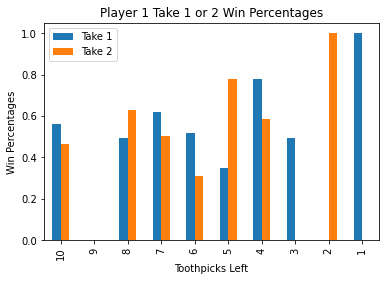

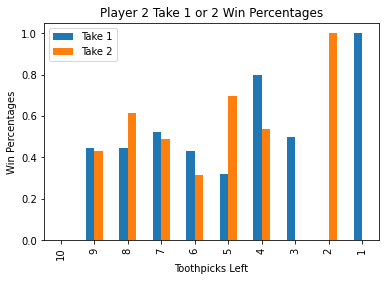

In [7]:
ax = p1_win_chances.plot.bar(title = "Player 1 Take 1 or 2 Win Percentages")
ax.set_xlabel("Toothpicks Left")
ax.set_ylabel("Win Percentages")

ax = p2_win_chances.plot.bar(title = "Player 2 Take 1 or 2 Win Percentages")
ax.set_xlabel("Toothpicks Left")
ax.set_ylabel("Win Percentages")

## Scaling Up

Now we will begin exploring this data on larger games. To make things easier, we will create a function to streamline this process.

In [8]:
def plot_win_chances(num_games, toothpicks, p1_strat_name, p2_strat_name, p1_data = None, p2_data = None):
    """
    Runs a specified number of games, collects data from them, and plots the win chances at each turn for both players.

    Parameters:
        num_games (int): Number of games to run
        toothpicks (int): Initial number of toothpicks to use
        p1_strat_name (string): Name of strategy for player 1 to use
        p2_strat_name (string): Name of strategy for player 2 to use
        p1_data (DataFrame): Win chance data for player 1
        p2_data (DataFrame): Win chance data for player 2
    """
    # Run the games
    game_data = run_game(num_games, toothpicks, p1_strat_name, p2_strat_name)
    
    # Read in the data
    tt_df = pd.read_csv("random_random_1000.csv")
    
    # Get each player's win chances
    p1_win_chances = pd.DataFrame.from_dict(get_win_chances(1, tt_df)).transpose()
    p2_win_chances = pd.DataFrame.from_dict(get_win_chances(2, tt_df)).transpose()
    
    # Plot Player 1's win chances
    ax = p1_win_chances.plot.bar(title = "Player 1 Win Percentages", figsize = (26, 8))
    ax.set_xlabel("Toothpicks Left")
    ax.set_ylabel("Win Percentages")

    # Plot Player 2's win chances
    ax = p2_win_chances.plot.bar(title = "Player 2 Win Percentages", figsize = (26, 8))
    ax.set_xlabel("Toothpicks Left")
    ax.set_ylabel("Win Percentages")

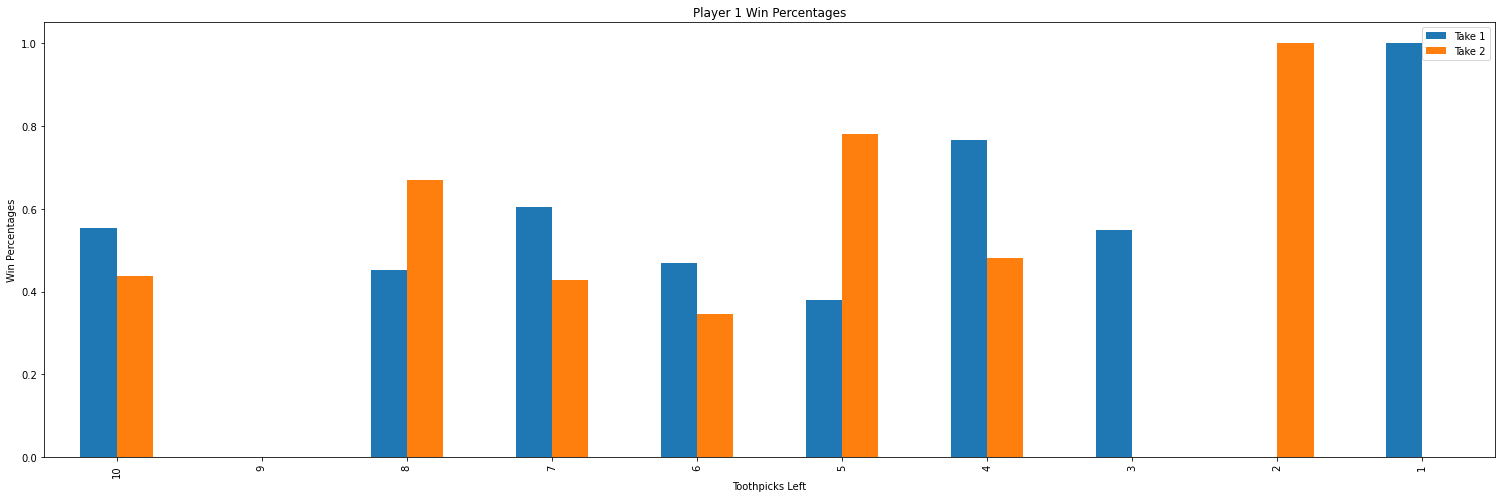

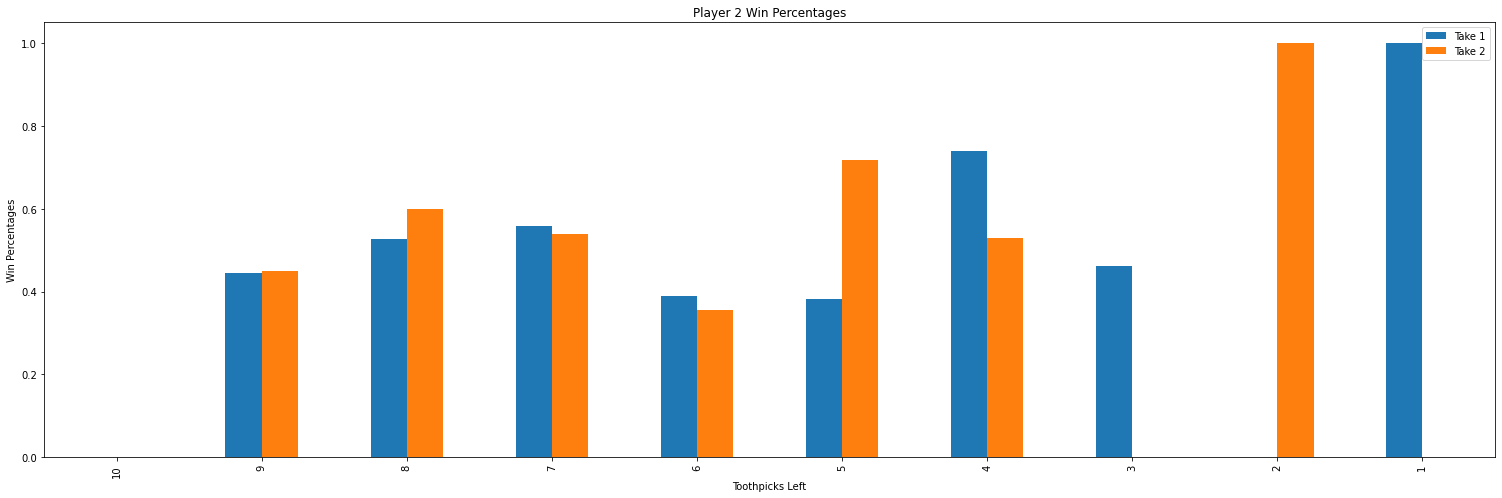

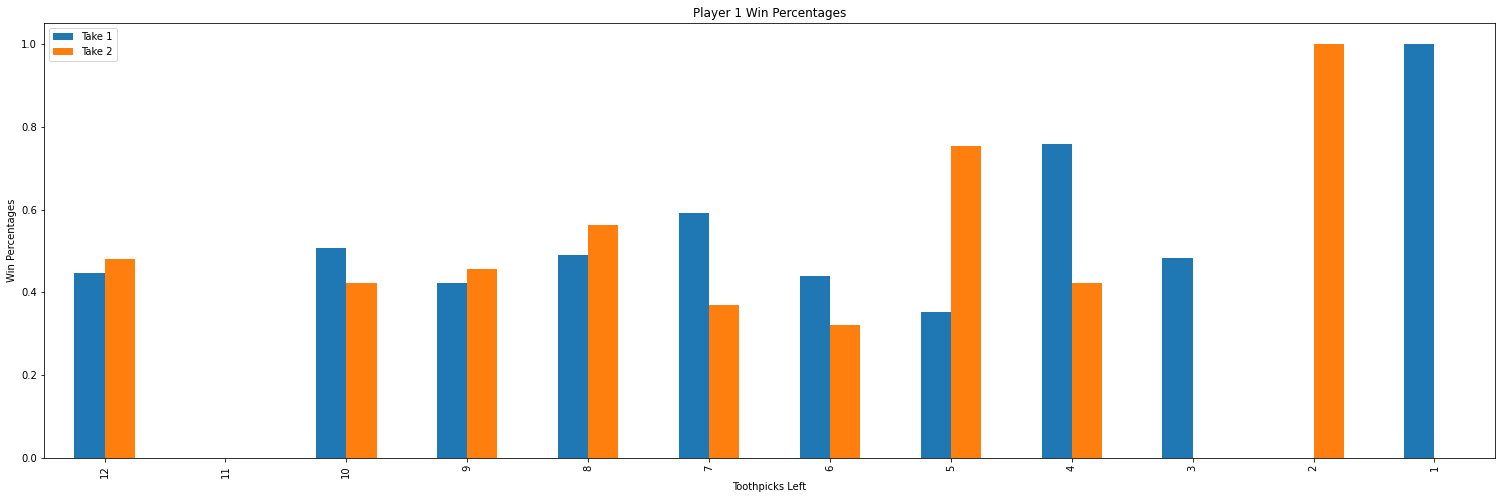

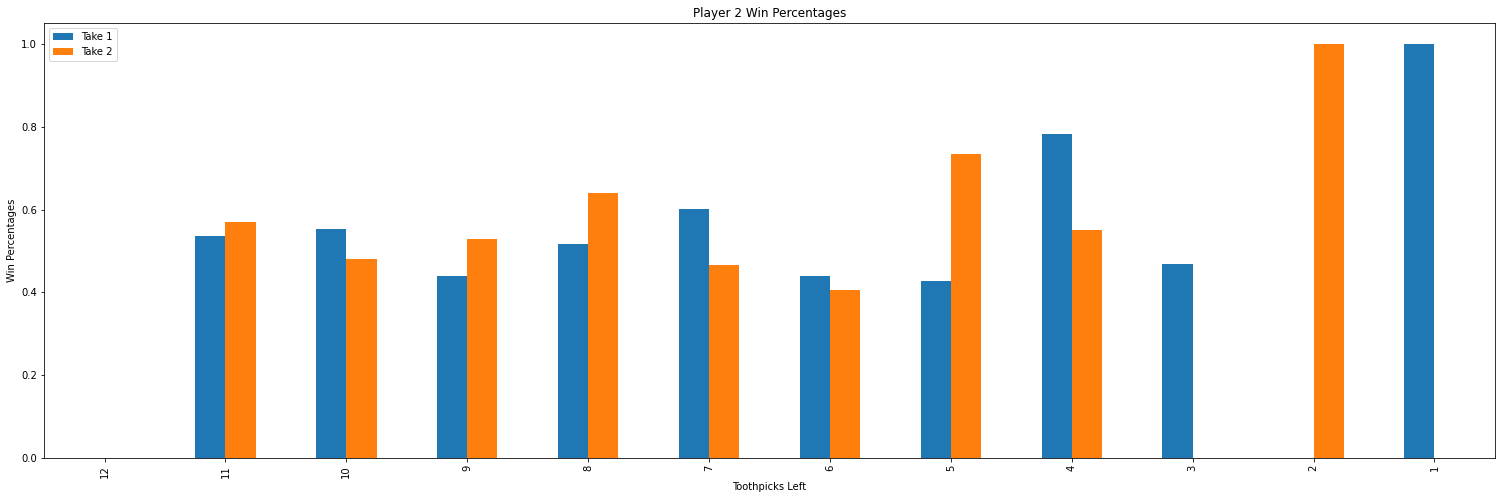

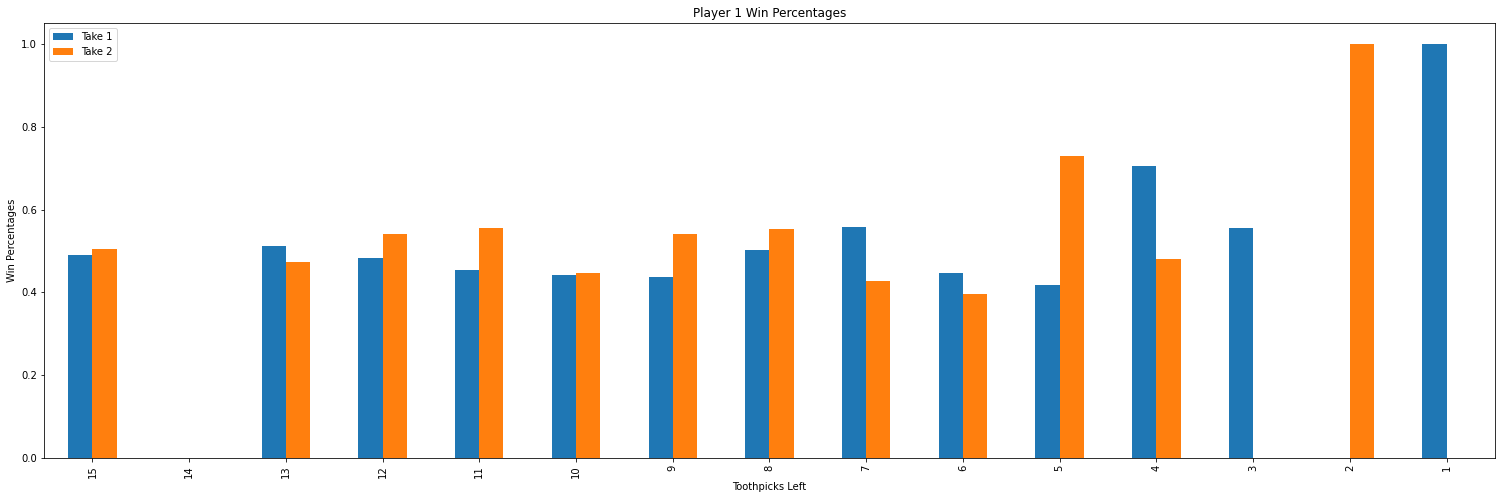

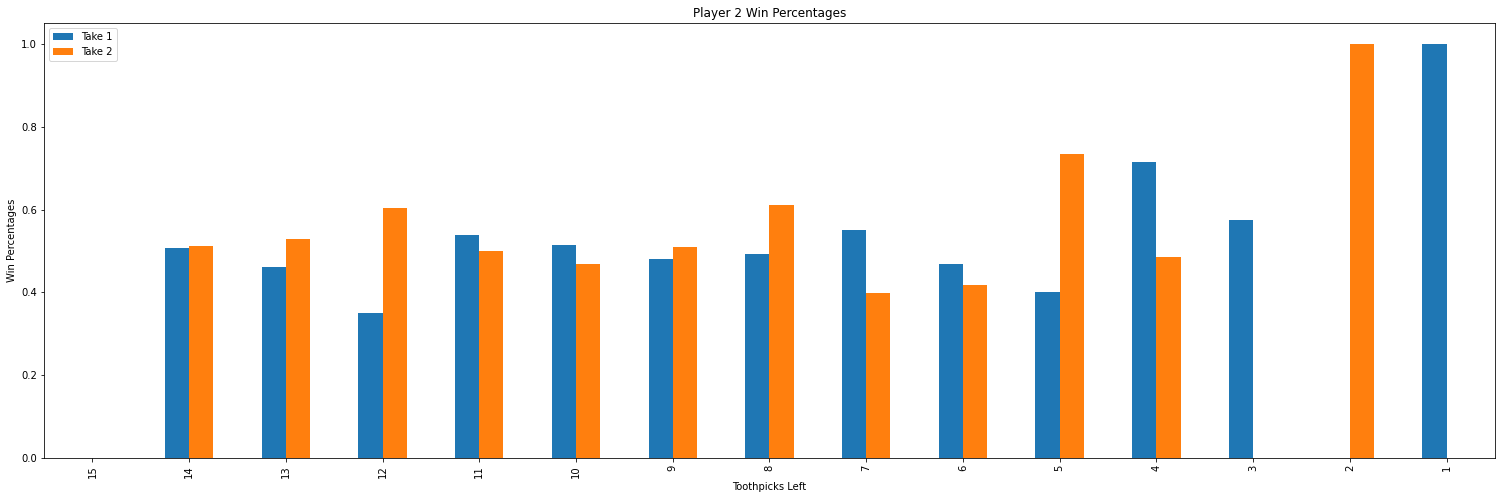

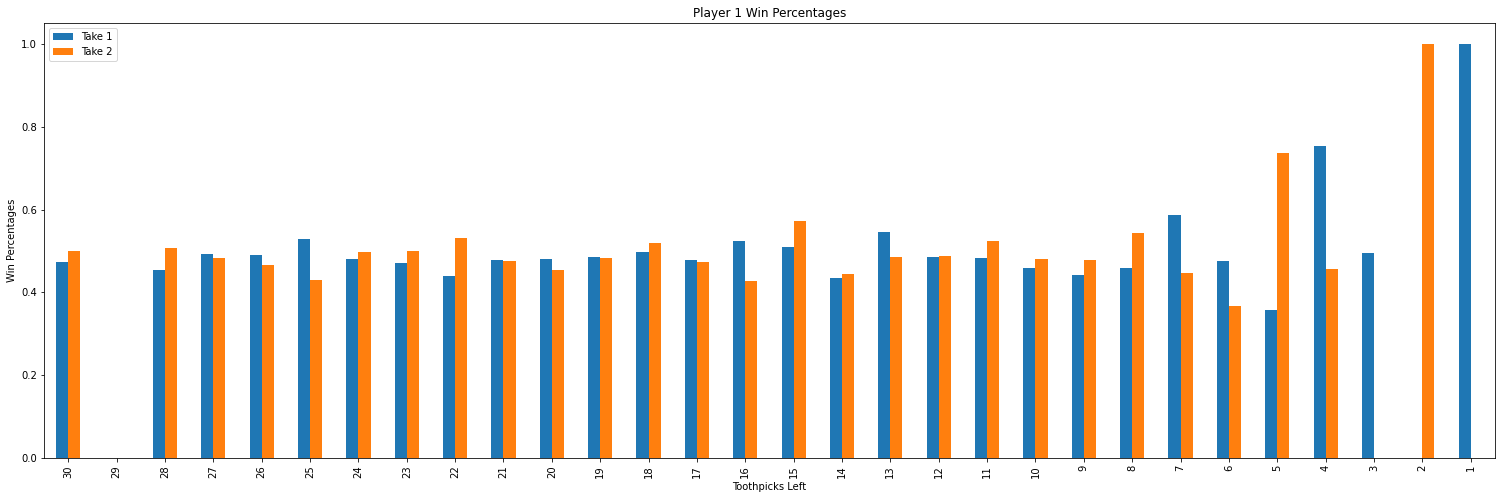

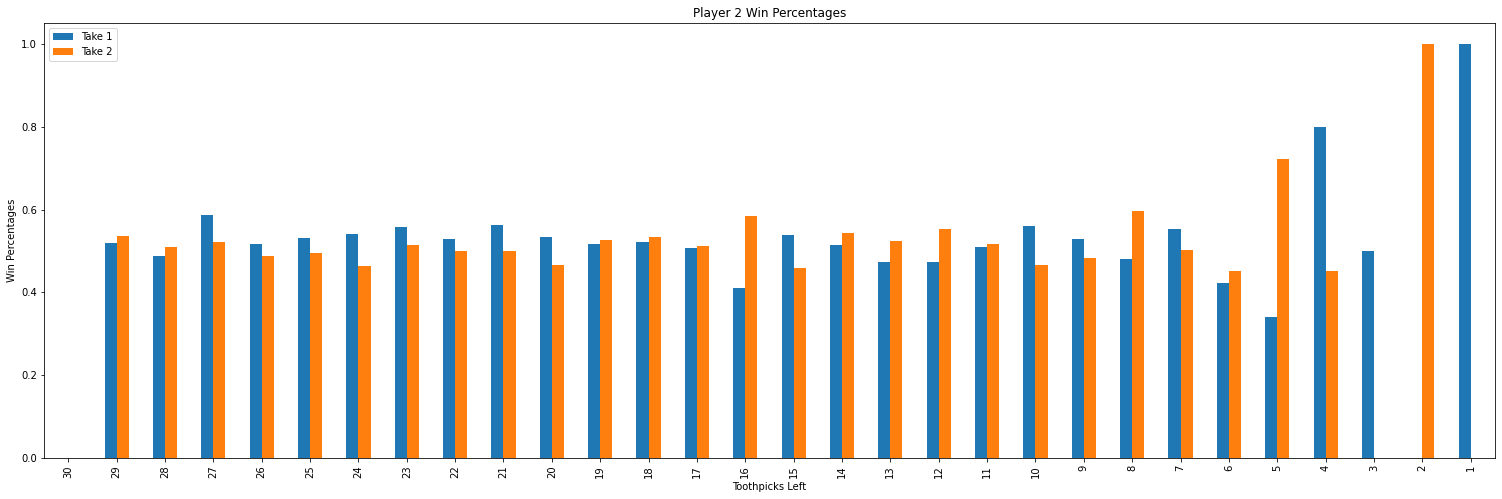

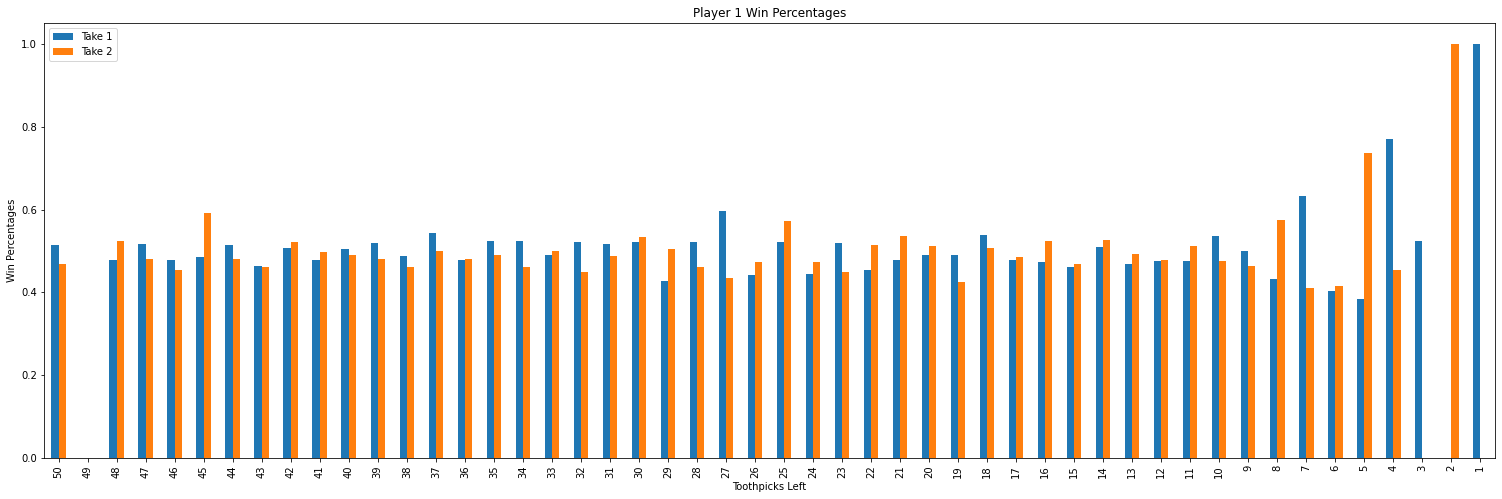

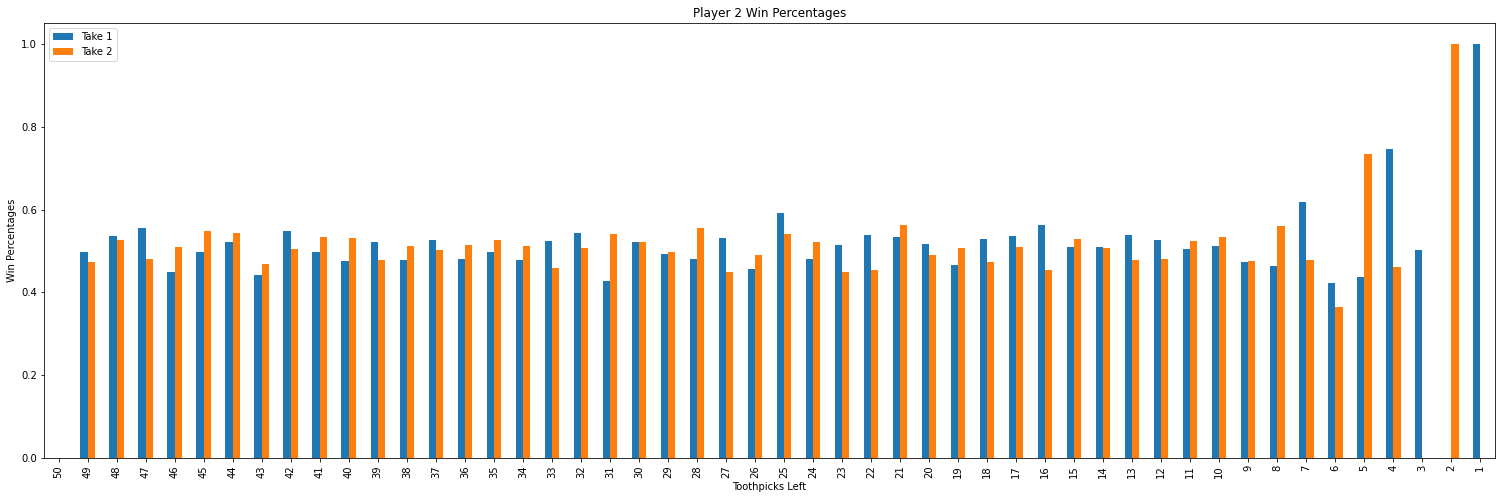

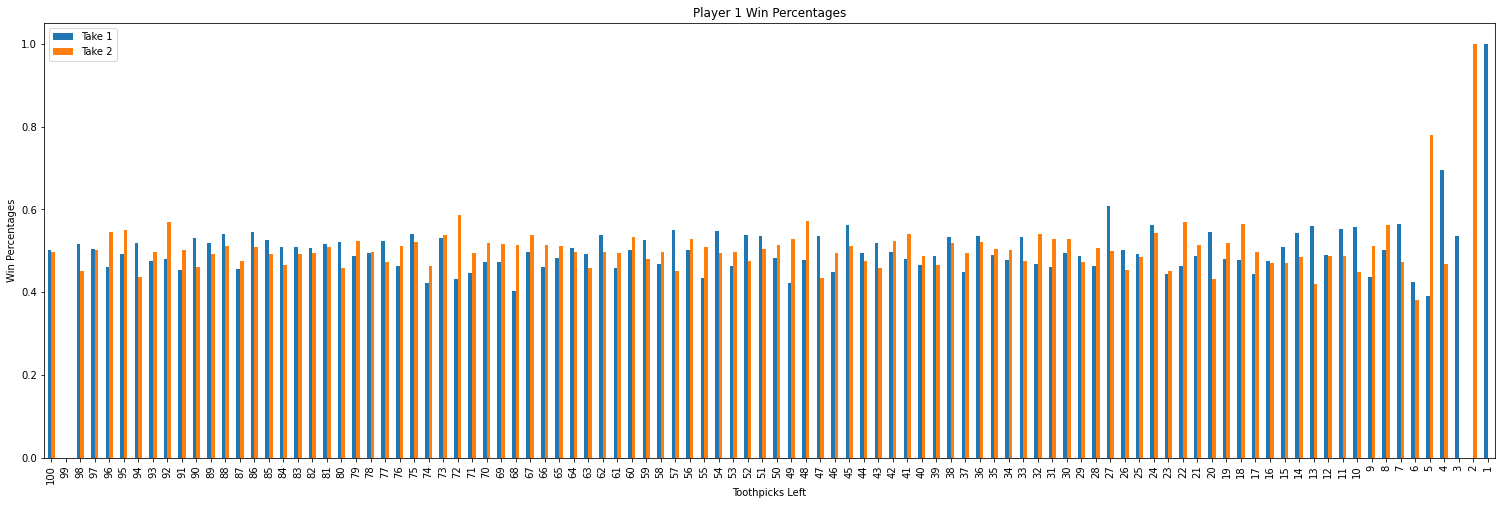

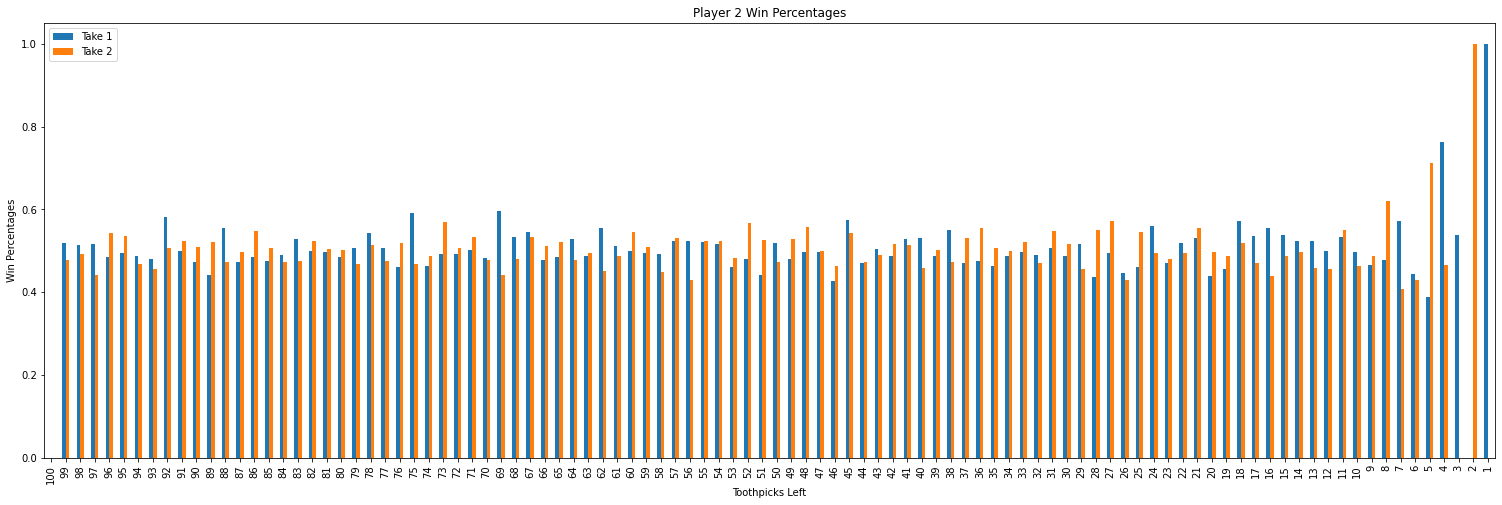

In [9]:
board_sizes = [10, 12, 15, 30, 50, 100]

for toothpicks in board_sizes:
    plot_win_chances(1000, toothpicks, "random", "random")

There is a large amount of data here. In fact, there is enough data here to be discussed thoroughly in another notebook. Right now, however, we are only looking for patterns. Overall, there seems to be very few patterns visible, if any at all. Remember that we want to find patterns in larger games, so let us try finding those patterns by training our players to be better.

## Evolution

To make this easier, we are going to create a function that *evolves* our players. That is, it feeds the win chances of the previous game into the players' strategies for the current game and repeats this process a specified number of times.

In [10]:
def evolve(generations, num_games, toothpicks, verbose = False):
    """
    Runs a game, collects the turn data, and feeds that to each player in a new game. Repeats for each generation.
    
    Parameters:
        generations (int): Number of generations to run
        num_games (int): Number of games to run
        toothpicks (int): Initial number of toothpicks to use
        verbose (bool): Whether to print information as the games are run
    
    Returns:
        A DataFrame of the last game played.
    """
    
    p1_data = None
    p2_data = None
    
    for i in range(generations):
        if verbose:
            print("\nGENERATION:", i + 1)
            print("Player 1 Win Chances\n", p1_data)
            print()
            print("Player 2 Win Chances\n", p2_data)
        p1_strat_name = "random" if p1_data is None else "smart"
        p2_strat_name = "random" if p2_data is None else "smart"
            
        # Run the games
        game_data = run_game(num_games, toothpicks, p1_strat_name, p2_strat_name, p1_data, p2_data)

        # Read in the data
        filename = "{}_{}_{}.csv".format(p1_strat_name, p2_strat_name, num_games)
        tt_df = pd.read_csv(filename)

        # Get each player's win chances
        p1_data = pd.DataFrame.from_dict(get_win_chances(1, tt_df)).transpose()
        p2_data = pd.DataFrame.from_dict(get_win_chances(2, tt_df)).transpose()
        
        print("\t", len([game for game in tt_df.index if tt_df["winner"][game] == "player_1"]), "games won by Player 1")

    return tt_df

Now we simply run a number of generations and look at the end data.

In [11]:
evolved_df = evolve(7, 1000, 10, True)
evolved_df


GENERATION: 1
Player 1 Win Chances
 None

Player 2 Win Chances
 None
	 491 games won by Player 1

GENERATION: 2
Player 1 Win Chances
       Take 1    Take 2
10  0.515810  0.465587
9   0.000000  0.000000
8   0.427419  0.552632
7   0.592742  0.477444
6   0.398734  0.360000
5   0.403226  0.666667
4   0.746269  0.541237
3   0.496894  0.000000
2   0.000000  1.000000
1   1.000000  0.000000

Player 2 Win Chances
       Take 1    Take 2
10  0.000000  0.000000
9   0.512605  0.458955
8   0.475610  0.592742
7   0.733333  0.421875
6   0.483333  0.357143
5   0.352113  0.753555
4   0.792593  0.453237
3   0.554878  0.000000
2   0.000000  1.000000
1   1.000000  0.000000
	 1000 games won by Player 1

GENERATION: 3
Player 1 Win Chances
     Take 1  Take 2
10     1.0     0.0
9      0.0     0.0
8      0.0     1.0
7      0.0     0.0
6      0.0     0.0
5      0.0     1.0
4      0.0     0.0
3      0.0     0.0
2      0.0     1.0
1      0.0     0.0

Player 2 Win Chances
     Take 1  Take 2
10     0.0     0.0


,10,turn_10,9,turn_9,8,turn_8,7,turn_7,6,turn_6,...,turn_5,4,turn_4,3,turn_3,2,turn_2,1,turn_1,winner
0,1,player_1,2,player_2,NaN,NaN,1.0,player_1,1.0,player_2,...,player_1,NaN,NaN,1.0,player_2,2.0,player_1,NaN,NaN,player_1
1,1,player_1,1,player_2,2.0,player_1,NaN,NaN,1.0,player_2,...,player_1,NaN,NaN,1.0,player_2,2.0,player_1,NaN,NaN,player_1
2,1,player_1,1,player_2,2.0,player_1,NaN,NaN,1.0,player_2,...,player_1,NaN,NaN,2.0,player_2,NaN,NaN,1.0,player_1,player_1
3,1,player_1,1,player_2,2.0,player_1,NaN,NaN,2.0,player_2,...,NaN,1.0,player_1,1.0,player_2,2.0,player_1,NaN,NaN,player_1
4,1,player_1,2,player_2,NaN,NaN,2.0,player_1,NaN,NaN,...,player_2,2.0,player_1,NaN,NaN,2.0,player_2,NaN,NaN,player_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,player_1,1,player_2,2.0,player_1,NaN,NaN,1.0,player_2,...,player_1,NaN,NaN,2.0,player_2,NaN,NaN,1.0,player_1,player_1
996,1,player_1,1,player_2,2.0,player_1,NaN,NaN,2.0,player_2,...,NaN,1.0,player_1,1.0,player_2,2.0,player_1,NaN,NaN,player_1
997,1,player_1,2,player_2,NaN,NaN,2.0,player_1,NaN,NaN,...,player_2,NaN,NaN,1.0,player_1,2.0,player_2,NaN,NaN,player_2
998,1,player_1,1,player_2,2.0,player_1,NaN,NaN,1.0,player_2,...,player_1,NaN,NaN,2.0,player_2,NaN,NaN,1.0,player_1,player_1


Interestingly enough, it seems to alternate between pure victories for Player 1 and *mostly* victories for Player 1. This seems to depend on whether or not Player 2 had lost the previous generation and is now moving randomly. On an even number of generations, the final data set is a 100% win rate for Player 1. On odd generations, the data set has some Player 2 victories.

This requires us to take a step back and think. Player 1 *should* be able to win 100% of the time, and that is not happening. Note that on odd generations, Player 1's win chances has no entries for some numbers. This is to be expected for the moves on `3`, `6`, and `9`, as a *smart* Player 1 would not allow itself to be put in the position to move on those turns. But, sometimes there are no entries for other turns as well. This is simple to explain. As both players are playing optimally from the *previous* game's data, any mistakes or errors present in the beginning will affect all future games/generations. To solve this, we need to train each player individually.

## Personal Training

We can modify the previous `evolve` function to train a player with a few simple changes:
* A `player` should be supplied to specify who to train
* The `player` should have a `smart` strategy and receive updated data each generation
* The `opponent` should have a `random` strategy and should never have data
* The function should return the win chance data at the end of the final generation

In [12]:
def train_player(player, generations, num_games, toothpicks, verbose = False):
    """
    Trains the specified player against a random moving opponent over a number of generations
    
    Parameters:
        player (int): The player to train
        generations (int): Number of generations to run
        num_games (int): Number of games to run
        toothpicks (int): Initial number of toothpicks to use
        verbose (bool): Whether to print information as the games are run
    
    Returns:
        A DataFrame of the trained player's most optimal win rates.
    """
        
    p1_data = None
    p2_data = None
    best_victories = 0
    
    for i in range(generations):
        if verbose:
            print("\nGENERATION:", i + 1)
            print("Player 1 Win Chances\n", p1_data)
            print()
            print("Player 2 Win Chances\n", p2_data)
        
        # Set a smart strategy for the player a random strategy for the opponent
        p1_strat_name = "random" if player == 2 or p1_data is None else "smart"
        p2_strat_name = "random" if player == 1 or p2_data is None else "smart"
            
        # Run the games
        game_data = run_game(num_games, toothpicks, p1_strat_name, p2_strat_name, p1_data, p2_data)

        # Read in the data
        filename = "{}_{}_{}.csv".format(p1_strat_name, p2_strat_name, num_games)
        tt_df = pd.read_csv(filename)
        
        # Get the number of games won
        games_won = len([game for game in tt_df.index if tt_df["winner"][game] == "player_{}".format(player)])
        
        # If more games were won in this generation than the previous best, update the data
        if games_won > best_victories:
            best_victories = games_won

            # Get each player's win chances
            if player == 1:
                p1_data = pd.DataFrame.from_dict(get_win_chances(1, tt_df)).transpose()
            elif player == 2:
                p2_data = pd.DataFrame.from_dict(get_win_chances(2, tt_df)).transpose()

        if verbose:
            print(games_won, "games won by Player {}".format(player))

    return p1_data if player == 1 else p2_data

Now we just train both players to get the needed data sets.

In [13]:
p1_optimal = train_player(1, 3, 1000, 10, True)
p1_optimal


GENERATION: 1
Player 1 Win Chances
 None

Player 2 Win Chances
 None
493 games won by Player 1

GENERATION: 2
Player 1 Win Chances
       Take 1    Take 2
10  0.518519  0.468872
9   0.000000  0.000000
8   0.495495  0.596330
7   0.605691  0.436293
6   0.422857  0.393750
5   0.327103  0.831933
4   0.766497  0.481675
3   0.483516  0.000000
2   0.000000  1.000000
1   1.000000  0.000000

Player 2 Win Chances
 None
1000 games won by Player 1

GENERATION: 3
Player 1 Win Chances
     Take 1  Take 2
10     1.0     0.0
9      0.0     0.0
8      0.0     1.0
7      1.0     0.0
6      0.0     0.0
5      0.0     1.0
4      1.0     0.0
3      0.0     0.0
2      0.0     1.0
1      1.0     0.0

Player 2 Win Chances
 None
1000 games won by Player 1


,Take 1,Take 2
10,1.0,0.0
9,0.0,0.0
8,0.0,1.0
7,1.0,0.0
6,0.0,0.0
5,0.0,1.0
4,1.0,0.0
3,0.0,0.0
2,0.0,1.0
1,1.0,0.0


In [14]:
p2_optimal = train_player(2, 5, 1000, 10, True)
p2_optimal


GENERATION: 1
Player 1 Win Chances
 None

Player 2 Win Chances
 None
537 games won by Player 2

GENERATION: 2
Player 1 Win Chances
 None

Player 2 Win Chances
       Take 1    Take 2
10  0.000000  0.000000
9   0.482490  0.520161
8   0.550943  0.600000
7   0.614286  0.471698
6   0.458537  0.456853
5   0.358696  0.798122
4   0.773050  0.507692
3   0.505682  0.000000
2   0.000000  1.000000
1   1.000000  0.000000
942 games won by Player 2

GENERATION: 3
Player 1 Win Chances
 None

Player 2 Win Chances
       Take 1    Take 2
10  0.000000  0.000000
9   0.000000  0.877895
8   0.000000  1.000000
7   0.000000  0.000000
6   0.754237  0.000000
5   0.000000  1.000000
4   1.000000  0.000000
3   0.524590  0.000000
2   0.000000  1.000000
1   1.000000  0.000000
930 games won by Player 2

GENERATION: 4
Player 1 Win Chances
 None

Player 2 Win Chances
       Take 1    Take 2
10  0.000000  0.000000
9   0.000000  0.877895
8   0.000000  1.000000
7   0.000000  0.000000
6   0.754237  0.000000
5   0.000000 

,Take 1,Take 2
10,0.000000,0.000000
9,0.000000,0.896422
8,0.000000,1.000000
7,0.000000,0.000000
6,0.790076,0.000000
5,0.000000,1.000000
4,1.000000,0.000000
3,0.549180,0.000000
2,0.000000,1.000000
1,1.000000,0.000000


Note that Player 2 needs a few more generations than Player 1 to train. In theory, it would be best to train both players equally. However, it is not necessary on this board size. With different board sizes, training lengths may vary.

## Duel of the Fates

Now we just need to pit these two optimized players against each other. We can do this without the need of a new function.

In [15]:
# Run the games
game_data = run_game(10, 10, "smart", "smart", p1_optimal, p2_optimal)

# Read in the data
filename = "{}_{}_{}.csv".format("smart", "smart", 10)
tt_df = pd.read_csv(filename)

It is not necessary to test this on a large number of games. In fact, a single game would suffice, as each player has no variation in its strategy.

In [16]:
tt_df

,10,turn_10,9,turn_9,8,turn_8,7,turn_7,6,turn_6,...,turn_5,4,turn_4,3,turn_3,2,turn_2,1,turn_1,winner
0,1,player_1,2,player_2,NaN,NaN,1,player_1,1,player_2,...,player_1,NaN,NaN,1,player_2,2,player_1,NaN,NaN,player_1
1,1,player_1,2,player_2,NaN,NaN,1,player_1,1,player_2,...,player_1,NaN,NaN,1,player_2,2,player_1,NaN,NaN,player_1
2,1,player_1,2,player_2,NaN,NaN,1,player_1,1,player_2,...,player_1,NaN,NaN,1,player_2,2,player_1,NaN,NaN,player_1
3,1,player_1,2,player_2,NaN,NaN,1,player_1,1,player_2,...,player_1,NaN,NaN,1,player_2,2,player_1,NaN,NaN,player_1
4,1,player_1,2,player_2,NaN,NaN,1,player_1,1,player_2,...,player_1,NaN,NaN,1,player_2,2,player_1,NaN,NaN,player_1
5,1,player_1,2,player_2,NaN,NaN,1,player_1,1,player_2,...,player_1,NaN,NaN,1,player_2,2,player_1,NaN,NaN,player_1
6,1,player_1,2,player_2,NaN,NaN,1,player_1,1,player_2,...,player_1,NaN,NaN,1,player_2,2,player_1,NaN,NaN,player_1
7,1,player_1,2,player_2,NaN,NaN,1,player_1,1,player_2,...,player_1,NaN,NaN,1,player_2,2,player_1,NaN,NaN,player_1
8,1,player_1,2,player_2,NaN,NaN,1,player_1,1,player_2,...,player_1,NaN,NaN,1,player_2,2,player_1,NaN,NaN,player_1
9,1,player_1,2,player_2,NaN,NaN,1,player_1,1,player_2,...,player_1,NaN,NaN,1,player_2,2,player_1,NaN,NaN,player_1


In [17]:
print(len([game for game in tt_df.index if tt_df["winner"][game] == "player_1"]), "games won by Player 1")

10 games won by Player 1


All victories for Player 1. This was expected, but now proven.

## Survival of the Fittest

With the code in place to train two optimal players and pit them against each other, we will now streamline this process and apply it to different initial toothpick sizes.

In [18]:
def compete_best_players(generations, num_games, toothpicks, verbose = False):
    """
    Trains two players individually on the specified board sizes and number of games. Then pits these two optimal players against each other.
    
    Parameters:
        generations (int): Number of generations to train on
        num_games (int): Number of games to train on
        toothpicks (int): Initial number of toothpicks to use
        verbose (bool): Whether to print information as the games are run
    
    Returns:
        A DataFrame of the games with both optimal players competing
    """
    p1_optimal = train_player(1, generations, num_games, toothpicks, verbose)
    p2_optimal = train_player(2, generations, num_games, toothpicks, verbose)
    
    game_data = run_game(5, toothpicks, "smart", "smart", p1_optimal, p2_optimal)
    filename = "{}_{}_{}.csv".format("smart", "smart", 5)
    tt_df = pd.read_csv(filename)
    
    return tt_df

Before running this function on various board sizes, we would like to predict that our claim of "Player 1 will always win if and only if `num_toothpicks % 3 != 0`" will hold true.

In [19]:
compete_best_players(10, 1000, 9)

,9,turn_9,8,turn_8,7,turn_7,6,turn_6,5,turn_5,4,turn_4,3,turn_3,2,turn_2,1,turn_1,winner
0,2,player_1,NaN,NaN,1,player_2,1,player_1,2,player_2,NaN,NaN,1,player_1,2,player_2,NaN,NaN,player_2
1,2,player_1,NaN,NaN,1,player_2,1,player_1,2,player_2,NaN,NaN,1,player_1,2,player_2,NaN,NaN,player_2
2,2,player_1,NaN,NaN,1,player_2,1,player_1,2,player_2,NaN,NaN,1,player_1,2,player_2,NaN,NaN,player_2
3,2,player_1,NaN,NaN,1,player_2,1,player_1,2,player_2,NaN,NaN,1,player_1,2,player_2,NaN,NaN,player_2
4,2,player_1,NaN,NaN,1,player_2,1,player_1,2,player_2,NaN,NaN,1,player_1,2,player_2,NaN,NaN,player_2


In [20]:
compete_best_players(10, 1000, 10)

,10,turn_10,9,turn_9,8,turn_8,7,turn_7,6,turn_6,...,turn_5,4,turn_4,3,turn_3,2,turn_2,1,turn_1,winner
0,1,player_1,1,player_2,2,player_1,NaN,NaN,1,player_2,...,player_1,NaN,NaN,1,player_2,2,player_1,NaN,NaN,player_1
1,1,player_1,1,player_2,2,player_1,NaN,NaN,1,player_2,...,player_1,NaN,NaN,1,player_2,2,player_1,NaN,NaN,player_1
2,1,player_1,1,player_2,2,player_1,NaN,NaN,1,player_2,...,player_1,NaN,NaN,1,player_2,2,player_1,NaN,NaN,player_1
3,1,player_1,1,player_2,2,player_1,NaN,NaN,1,player_2,...,player_1,NaN,NaN,1,player_2,2,player_1,NaN,NaN,player_1
4,1,player_1,1,player_2,2,player_1,NaN,NaN,1,player_2,...,player_1,NaN,NaN,1,player_2,2,player_1,NaN,NaN,player_1


In [21]:
compete_best_players(10, 1000, 11)

,11,turn_11,10,turn_10,9,turn_9,8,turn_8,7,turn_7,...,turn_5,4,turn_4,3,turn_3,2,turn_2,1,turn_1,winner
0,1,player_1,1,player_2,1,player_1,2,player_2,NaN,NaN,...,player_2,NaN,NaN,1,player_1,2,player_2,NaN,NaN,player_2
1,1,player_1,1,player_2,1,player_1,2,player_2,NaN,NaN,...,player_2,NaN,NaN,1,player_1,2,player_2,NaN,NaN,player_2
2,1,player_1,1,player_2,1,player_1,2,player_2,NaN,NaN,...,player_2,NaN,NaN,1,player_1,2,player_2,NaN,NaN,player_2
3,1,player_1,1,player_2,1,player_1,2,player_2,NaN,NaN,...,player_2,NaN,NaN,1,player_1,2,player_2,NaN,NaN,player_2
4,1,player_1,1,player_2,1,player_1,2,player_2,NaN,NaN,...,player_2,NaN,NaN,1,player_1,2,player_2,NaN,NaN,player_2


In [22]:
compete_best_players(10, 1000, 12)

,12,turn_12,11,turn_11,10,turn_10,9,turn_9,8,turn_8,...,turn_5,4,turn_4,3,turn_3,2,turn_2,1,turn_1,winner
0,2,player_1,NaN,NaN,1,player_2,2,player_1,NaN,NaN,...,player_2,NaN,NaN,1,player_1,2,player_2,NaN,NaN,player_2
1,2,player_1,NaN,NaN,1,player_2,2,player_1,NaN,NaN,...,player_2,NaN,NaN,1,player_1,2,player_2,NaN,NaN,player_2
2,2,player_1,NaN,NaN,1,player_2,2,player_1,NaN,NaN,...,player_2,NaN,NaN,1,player_1,2,player_2,NaN,NaN,player_2
3,2,player_1,NaN,NaN,1,player_2,2,player_1,NaN,NaN,...,player_2,NaN,NaN,1,player_1,2,player_2,NaN,NaN,player_2
4,2,player_1,NaN,NaN,1,player_2,2,player_1,NaN,NaN,...,player_2,NaN,NaN,1,player_1,2,player_2,NaN,NaN,player_2


In [23]:
compete_best_players(10, 1000, 13)

,13,turn_13,12,turn_12,11,turn_11,10,turn_10,9,turn_9,...,turn_5,4,turn_4,3,turn_3,2,turn_2,1,turn_1,winner
0,1,player_1,2,player_2,NaN,NaN,1,player_1,1,player_2,...,player_1,NaN,NaN,1,player_2,2,player_1,NaN,NaN,player_1
1,1,player_1,2,player_2,NaN,NaN,1,player_1,1,player_2,...,player_1,NaN,NaN,1,player_2,2,player_1,NaN,NaN,player_1
2,1,player_1,2,player_2,NaN,NaN,1,player_1,1,player_2,...,player_1,NaN,NaN,1,player_2,2,player_1,NaN,NaN,player_1
3,1,player_1,2,player_2,NaN,NaN,1,player_1,1,player_2,...,player_1,NaN,NaN,1,player_2,2,player_1,NaN,NaN,player_1
4,1,player_1,2,player_2,NaN,NaN,1,player_1,1,player_2,...,player_1,NaN,NaN,1,player_2,2,player_1,NaN,NaN,player_1


In [24]:
compete_best_players(10, 1000, 14)

,14,turn_14,13,turn_13,12,turn_12,11,turn_11,10,turn_10,...,turn_5,4,turn_4,3,turn_3,2,turn_2,1,turn_1,winner
0,2,player_1,NaN,NaN,2,player_2,NaN,NaN,1,player_1,...,player_1,NaN,NaN,1,player_2,2,player_1,NaN,NaN,player_1
1,2,player_1,NaN,NaN,2,player_2,NaN,NaN,1,player_1,...,player_1,NaN,NaN,1,player_2,2,player_1,NaN,NaN,player_1
2,2,player_1,NaN,NaN,2,player_2,NaN,NaN,1,player_1,...,player_1,NaN,NaN,1,player_2,2,player_1,NaN,NaN,player_1
3,2,player_1,NaN,NaN,2,player_2,NaN,NaN,1,player_1,...,player_1,NaN,NaN,1,player_2,2,player_1,NaN,NaN,player_1
4,2,player_1,NaN,NaN,2,player_2,NaN,NaN,1,player_1,...,player_1,NaN,NaN,1,player_2,2,player_1,NaN,NaN,player_1


After viewing the data, our claim is not supported. Uppon re-running every cell in the notebook, it seems to vary the outcome of the games. Sometimes, Player 2 is winning on some games not divisible by 3. This requires further investigation.